# Melbourne Property Price Prediction 

โปรเจคนี้ใช้ MelbourneHousingMarket dataset จาก https://www.kaggle.com/anthonypino/melbourne-housing-market
ในส่วนของการสร้างโมเดลจะใช้เทคนิคที่เรียกว่า Regression มาทำการสร้าง Machine Learning Model เพื่อทำนายราคาของอสังหาริมทรัพย์ในเมือง Melbourne
ประเทศออสเตรเลีย

## Data

ในส่วนของ dataset จะประกอบไปด้วยคอลัมน์ดังนี้

**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Price**: Price in Australian dollars

**Method**: 
* **S** - property sold.    
* **SP** - property sold prior. 
* **PI** - property passed in.   
* **PN** - sold prior not disclosed.    
* **SN** - sold not disclosed.   
* **NB** - no bid.  
* **VB** - vendor bid.
* **W** - withdrawn prior to auction.    
* **SA** - sold after auction.   
* **SS** - sold after auction price not disclosed.    
* **N/A** - price or highest bid not available.

**Type**:
* **br** - bedroom(s).
* **h** - house,cottage,villa, semi,terrace.
* **u** - unit, duplex.
* **t** - townhouse.
* **dev site** - development site.
* **o res** - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD in Kilometres

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea**: Building Size in Metres

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explanitory

**Longtitude**: Self explanitory

### Import Iibrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv') 

### Preview data

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [6]:
df.shape

(34857, 21)

### Find Missing Data

In [7]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<AxesSubplot:>

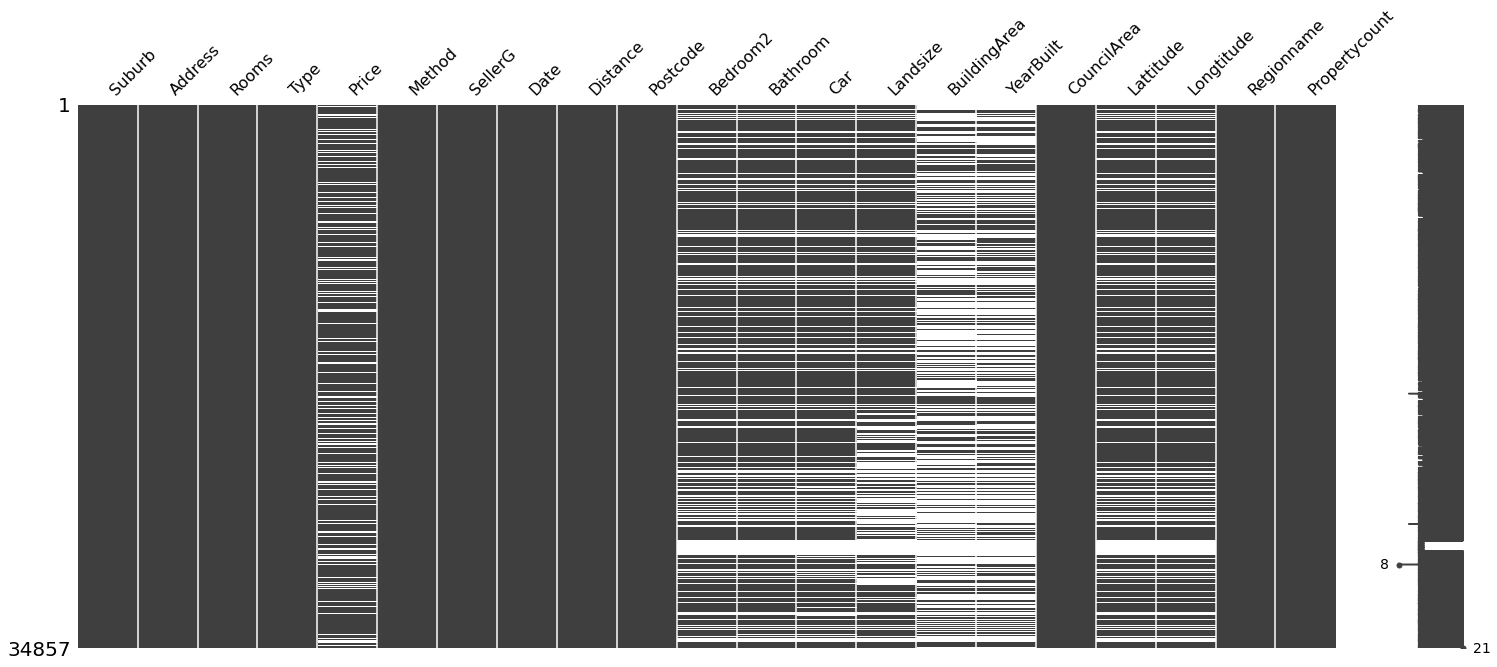

In [8]:
msno.matrix(df)

หากเราสังเกตด้วยตาจาก Matrix of Nullity เราจะอนุมานได้ว่าคอลัมน์ Bedroom2, Bathroom, Car, Landsize, Lattitude, Longtitude มีความสัมพันธ์กันของ Missing data และคอลัมน์ BuildingArea กับ YearBuilt ก็มีความสัมพันธ์กันของ Missing data

In [9]:
df['Postcode'] = df['Postcode'].astype('category')
df['Lattitude'] = df['Lattitude'].astype('category')
df['Longtitude'] = df['Longtitude'].astype('category')
df['Suburb'] = df['Suburb'].astype('category')
df['Address'] = df['Address'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Method'] = df['Method'].astype('category')
df['SellerG'] = df['SellerG'].astype('category')
df['Date'] = df['Date'].astype('category')
df['CouncilArea'] = df['CouncilArea'].astype('category')
df['Regionname'] = df['Regionname'].astype('category')

In [10]:
df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,7572.888306
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,4428.090313
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,83.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,4385.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,6763.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,10412.000000
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,21650.000000


In [11]:
df.dtypes

Suburb           category
Address          category
Rooms               int64
Type             category
Price             float64
Method           category
SellerG          category
Date             category
Distance          float64
Postcode         category
Bedroom2          float64
Bathroom          float64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt         float64
CouncilArea      category
Lattitude        category
Longtitude       category
Regionname       category
Propertycount     float64
dtype: object

In [12]:
dfint = df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']].copy()

In [13]:
dfint

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,NaN,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,NaN,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,4.0,1.0,3.0,593.0,NaN,NaN,6543.0
34853,2,888000.0,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,6543.0
34854,2,705000.0,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,6543.0
34855,3,1140000.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN,6543.0


In [14]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(dfint)

In [15]:
data_with_imputed_values

array([[2.00000000e+00, 1.05017334e+06, 2.50000000e+00, ...,
        1.60256400e+02, 1.96528988e+03, 4.01900000e+03],
       [2.00000000e+00, 1.48000000e+06, 2.50000000e+00, ...,
        1.60256400e+02, 1.96528988e+03, 4.01900000e+03],
       [2.00000000e+00, 1.03500000e+06, 2.50000000e+00, ...,
        7.90000000e+01, 1.90000000e+03, 4.01900000e+03],
       ...,
       [2.00000000e+00, 7.05000000e+05, 6.30000000e+00, ...,
        1.20000000e+02, 2.00000000e+03, 6.54300000e+03],
       [3.00000000e+00, 1.14000000e+06, 6.30000000e+00, ...,
        1.60256400e+02, 1.96528988e+03, 6.54300000e+03],
       [2.00000000e+00, 1.02000000e+06, 6.30000000e+00, ...,
        1.03000000e+02, 1.93000000e+03, 6.54300000e+03]])

In [16]:
dfintter = pd.DataFrame(data_with_imputed_values)

In [17]:
dfintter

,0,1,2,3,4,5,6,7,8,9
0,2.0,1.050173e+06,2.5,2.000000,1.000000,1.000000,126.000000,160.2564,1965.289885,4019.0
1,2.0,1.480000e+06,2.5,2.000000,1.000000,1.000000,202.000000,160.2564,1965.289885,4019.0
2,2.0,1.035000e+06,2.5,2.000000,1.000000,0.000000,156.000000,79.0000,1900.000000,4019.0
3,3.0,1.050173e+06,2.5,3.000000,2.000000,1.000000,0.000000,160.2564,1965.289885,4019.0
4,3.0,1.465000e+06,2.5,3.000000,2.000000,0.000000,134.000000,150.0000,1900.000000,4019.0
...,...,...,...,...,...,...,...,...,...,...
34852,4.0,1.480000e+06,6.3,4.000000,1.000000,3.000000,593.000000,160.2564,1965.289885,6543.0
34853,2.0,8.880000e+05,6.3,2.000000,2.000000,1.000000,98.000000,104.0000,2018.000000,6543.0
34854,2.0,7.050000e+05,6.3,2.000000,1.000000,2.000000,220.000000,120.0000,2000.000000,6543.0
34855,3.0,1.140000e+06,6.3,3.084647,1.624798,1.728845,593.598993,160.2564,1965.289885,6543.0


In [18]:
id = ['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']

In [19]:
dfintter.columns = id

In [20]:
dfintter

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2.0,1.050173e+06,2.5,2.000000,1.000000,1.000000,126.000000,160.2564,1965.289885,4019.0
1,2.0,1.480000e+06,2.5,2.000000,1.000000,1.000000,202.000000,160.2564,1965.289885,4019.0
2,2.0,1.035000e+06,2.5,2.000000,1.000000,0.000000,156.000000,79.0000,1900.000000,4019.0
3,3.0,1.050173e+06,2.5,3.000000,2.000000,1.000000,0.000000,160.2564,1965.289885,4019.0
4,3.0,1.465000e+06,2.5,3.000000,2.000000,0.000000,134.000000,150.0000,1900.000000,4019.0
...,...,...,...,...,...,...,...,...,...,...
34852,4.0,1.480000e+06,6.3,4.000000,1.000000,3.000000,593.000000,160.2564,1965.289885,6543.0
34853,2.0,8.880000e+05,6.3,2.000000,2.000000,1.000000,98.000000,104.0000,2018.000000,6543.0
34854,2.0,7.050000e+05,6.3,2.000000,1.000000,2.000000,220.000000,120.0000,2000.000000,6543.0
34855,3.0,1.140000e+06,6.3,3.084647,1.624798,1.728845,593.598993,160.2564,1965.289885,6543.0


In [21]:
df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']] = dfintter[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']]

In [22]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2.0,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.000000,1.000000,126.000000,160.2564,1965.289885,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2.0,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.000000,1.000000,202.000000,160.2564,1965.289885,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2.0,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,1.000000,0.000000,156.000000,79.0000,1900.000000,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3.0,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,2.000000,1.000000,0.000000,160.2564,1965.289885,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3.0,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,2.000000,0.000000,134.000000,150.0000,1900.000000,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4.0,h,1.480000e+06,PI,Jas,24/02/2018,6.3,3013.0,...,1.000000,3.000000,593.000000,160.2564,1965.289885,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2.0,h,8.880000e+05,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.000000,1.000000,98.000000,104.0000,2018.000000,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2.0,t,7.050000e+05,S,Jas,24/02/2018,6.3,3013.0,...,1.000000,2.000000,220.000000,120.0000,2000.000000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3.0,h,1.140000e+06,SP,hockingstuart,24/02/2018,6.3,3013.0,...,1.624798,1.728845,593.598993,160.2564,1965.289885,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


<AxesSubplot:>

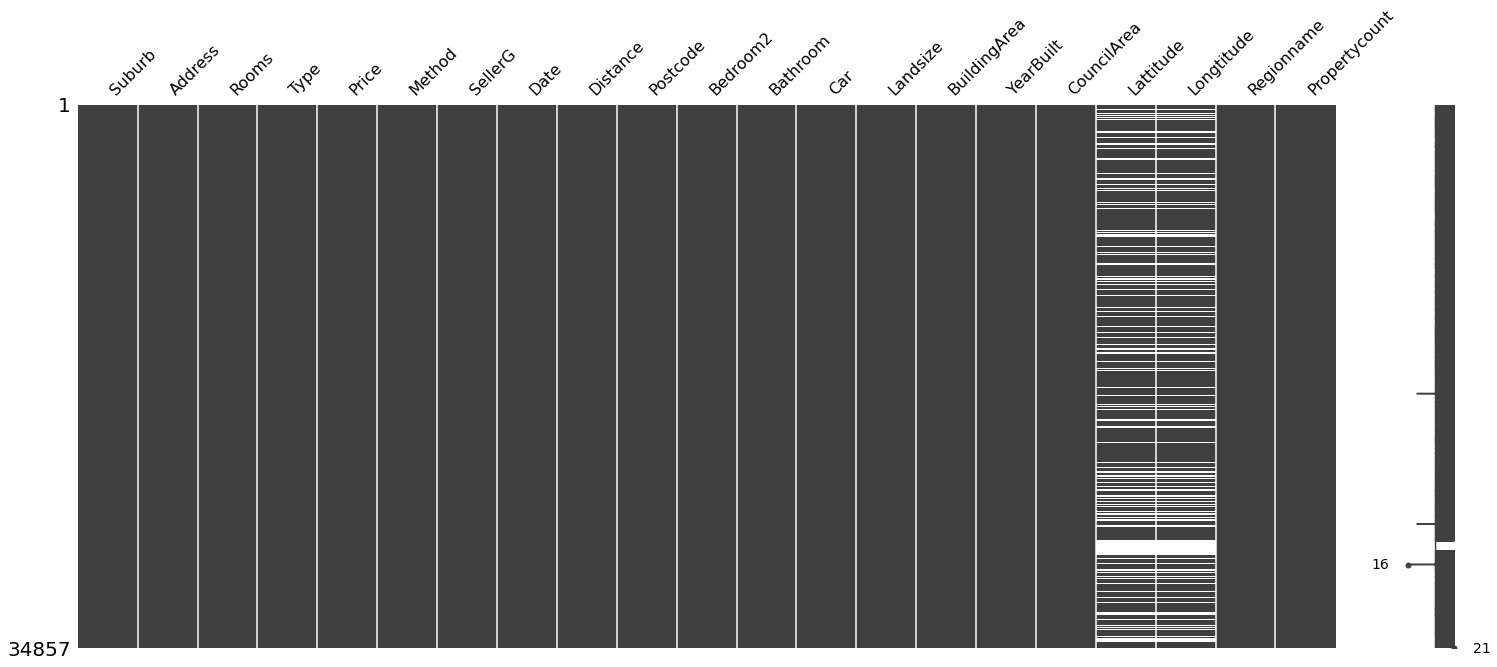

In [23]:
msno.matrix(df)

In [24]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       0
dtype: int64